In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings 
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('diabetes (4).csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


##### This dataset contains 9 Columns and 768 records in which there are no null values

In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
for i in ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']:
    df[i].replace(0,np.nan,inplace=True)
    df[i].fillna(df[i].mean(),inplace=True)

In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,8.790942,85.021108,6.875151,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.153420,155.548223,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,155.548223,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
# seperate x & y

x = df.iloc[:,1:-1]
y = df['Outcome']

In [9]:
#split data into train and test

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=1)

In [10]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [11]:
lr.fit(xtrain,ytrain)
ypred = lr.predict(xtest)

In [12]:
#evaluate model

from sklearn.metrics import classification_report
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       123
           1       0.73      0.64      0.68        69

    accuracy                           0.79       192
   macro avg       0.77      0.75      0.76       192
weighted avg       0.78      0.79      0.78       192



### Hypertuning using solver parameter

In [22]:
lr = LogisticRegression(solver='liblinear')                
lr.fit(xtrain,ytrain)
ypred = lr.predict(xtest)

In [23]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       123
           1       0.73      0.64      0.68        69

    accuracy                           0.79       192
   macro avg       0.77      0.75      0.76       192
weighted avg       0.78      0.79      0.78       192



In [24]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
xtrain = sc.fit_transform(xtrain)
xtest = sc.transform(xtest)

In [25]:
lr = LogisticRegression(solver='saga')
lr.fit(xtrain,ytrain)
ypred = lr.predict(xtest)

In [26]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       123
           1       0.73      0.64      0.68        69

    accuracy                           0.79       192
   macro avg       0.77      0.75      0.76       192
weighted avg       0.78      0.79      0.78       192



In [27]:
lr = LogisticRegression(solver='sag')
lr.fit(xtrain,ytrain)
ypred = lr.predict(xtest)

In [28]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       123
           1       0.73      0.64      0.68        69

    accuracy                           0.79       192
   macro avg       0.77      0.75      0.76       192
weighted avg       0.78      0.79      0.78       192



In [29]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,8.790942,85.021108,6.875151,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.153420,155.548223,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,155.548223,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# ROC AUC

In [33]:
print(f'Actual values: {ytest[:25]}.values')
print(f"Predicted values: {ypred[:25]}")

Actual values: 285    0
101    0
581    0
352    0
726    0
472    0
233    0
385    0
556    0
59     0
756    0
341    0
445    1
614    1
371    0
355    1
19     1
711    0
430    0
117    0
493    1
218    1
159    1
667    1
553    0
Name: Outcome, dtype: int64.values
Predicted values: [0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0]


In [35]:
xtest

array([[ 0.47897325,  0.13298215, -0.3268802 , ..., -0.89931549,
         0.54128043,  1.51430834],
       [ 0.9802887 , -0.97523127,  0.03638016, ..., -0.8846209 ,
        -0.8726081 , -0.94438203],
       [-0.42339457, -0.97523127, -0.21168451, ..., -1.04626144,
        -0.79103761, -0.5204699 ],
       ...,
       [-0.55707869, -0.02533405,  0.01870688, ...,  0.70239529,
        -0.93303069, -0.43568747],
       [-1.52628857, -0.97523127,  0.03638016, ...,  0.09991692,
        -0.86958697,  0.66648407],
       [-0.92471003, -0.57944076, -0.78766297, ..., -1.09034522,
        -0.96626311, -1.02916445]])

In [37]:
lr.predict_proba(xtest)

array([[0.57850082, 0.42149918],
       [0.70013209, 0.29986791],
       [0.90024587, 0.09975413],
       [0.92160879, 0.07839121],
       [0.72230062, 0.27769938],
       [0.66405324, 0.33594676],
       [0.66556574, 0.33443426],
       [0.89057357, 0.10942643],
       [0.78969437, 0.21030563],
       [0.71846472, 0.28153528],
       [0.59337928, 0.40662072],
       [0.89460257, 0.10539743],
       [0.01130044, 0.98869956],
       [0.33859858, 0.66140142],
       [0.64253989, 0.35746011],
       [0.32598345, 0.67401655],
       [0.68890117, 0.31109883],
       [0.67678682, 0.32321318],
       [0.95703104, 0.04296896],
       [0.89361712, 0.10638288],
       [0.57136352, 0.42863648],
       [0.88707032, 0.11292968],
       [0.11685689, 0.88314311],
       [0.83080192, 0.16919808],
       [0.91735683, 0.08264317],
       [0.56103526, 0.43896474],
       [0.72733569, 0.27266431],
       [0.375779  , 0.624221  ],
       [0.87550349, 0.12449651],
       [0.60781987, 0.39218013],
       [0.

In [38]:
#changing the threshold manually

In [42]:
ypredprob=lr.predict_proba(xtest)[:,1]

In [43]:
from sklearn.preprocessing import binarize

In [44]:
ypred=binarize([ypredprob],threshold=0.30)[0]

In [45]:
ypred

array([1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 1., 1., 1., 1., 1.,
       1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 1.,
       0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0.,
       0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1.,
       1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 1.,
       1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1.,
       1., 0., 1., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0.,
       0., 1., 0., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 1., 1., 1.,
       1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0.,
       1., 1., 0., 0., 0.])

In [46]:
print(f'Actual values: {ytest[:25].values}')
print(f'Predicted values: {ypred[:25]}')      

Actual values: [0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 1 1 1 1 0]
Predicted values: [1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 0.
 0.]


In [47]:
#here FPR high and FNR will be low

In [48]:
from sklearn.metrics import roc_curve
fpr,tpr,thres=roc_curve(ytest,ypredprob)

In [49]:
thres

array([1.98869956, 0.98869956, 0.86997397, 0.86685139, 0.86136844,
       0.85026766, 0.81426519, 0.79929372, 0.77348354, 0.74997781,
       0.73248614, 0.72346006, 0.70119627, 0.69110559, 0.67401655,
       0.67329615, 0.65687991, 0.64190263, 0.62282024, 0.61385173,
       0.58254676, 0.56402474, 0.54413465, 0.53123432, 0.51608267,
       0.50846608, 0.50365558, 0.47453636, 0.47086801, 0.46561206,
       0.45452187, 0.43896474, 0.42487293, 0.39649065, 0.39218013,
       0.38614671, 0.37278418, 0.34680654, 0.33976516, 0.33443426,
       0.33424634, 0.33214394, 0.32917383, 0.31687737, 0.31648713,
       0.31301466, 0.30310588, 0.27879611, 0.27867956, 0.27075422,
       0.26206706, 0.21969111, 0.2160924 , 0.20775811, 0.20001861,
       0.17745127, 0.17629564, 0.17451713, 0.16919808, 0.13099942,
       0.12835773, 0.11370678, 0.11292968, 0.01652686])

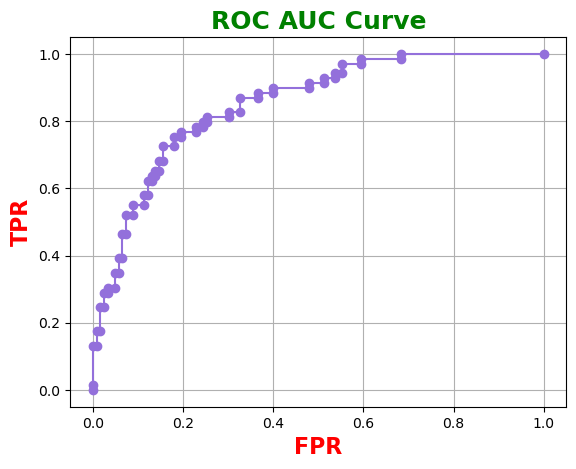

In [58]:
plt.title('ROC AUC Curve',color='green',weight='bold',size=18)
plt.plot(fpr,tpr,marker='o',color='mediumpurple')
plt.xlabel('FPR',color='red',weight='bold',size=16)
plt.ylabel('TPR',color='red',weight='bold',size=16)
plt.grid()
plt.show()